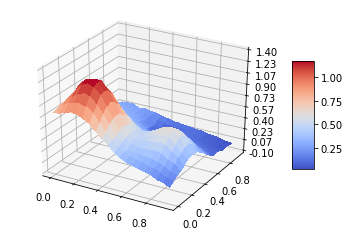

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx


fig         = plt.figure() 
ax          = fig.gca(projection='3d')

# Make data. 
x           = np.arange(0, 1, 0.05) 
y           = np.arange(0, 1, 0.05)
design      = fx.DesignDesign(x,y,10)
x, y        = np.meshgrid(x,y)
noise_level = 0.01


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()





This is not a nice way of plotting the data, do you know any better display methods? Preferably less grainy.

In [16]:

#beta_ols = fx.OridinaryLeastSquares(design,frank)
#beta_ridge = fx.RidgeRegression(design,frank,0.001)
print(np.shape(design))

#print(beta_ridge)

(20, 65)
